<a href="https://colab.research.google.com/github/Kshitijasharma/celebal_internship/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [9]:
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [10]:
df.select_dtypes('number').corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Order             -0.031408
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0

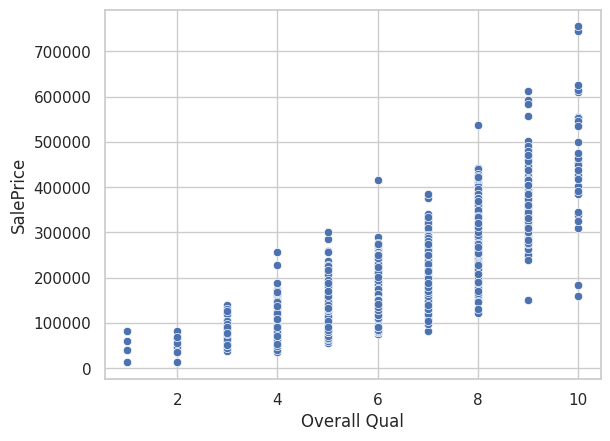

In [11]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

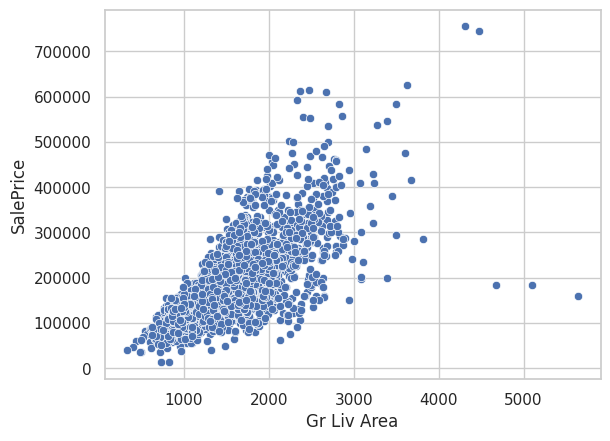

In [12]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

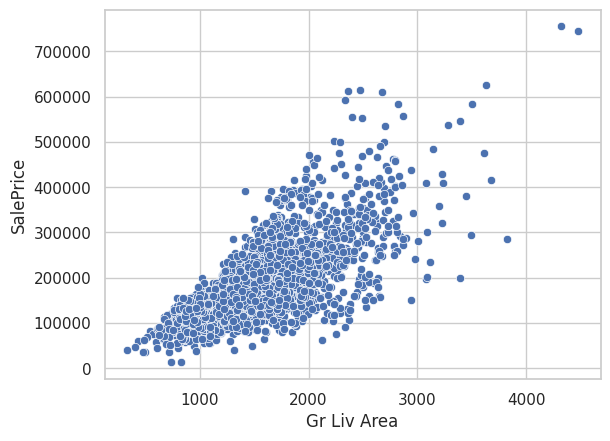

In [13]:
index_to_drop = df[(df['SalePrice']<300000) & (df['Gr Liv Area']>4000)].index
df = df.drop(index_to_drop,axis=0)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

In [14]:
df = df.drop(['Order','PID'],axis=1)

In [15]:
# Func returning percentage of missing data in each col
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

def show_percent_missing(df):
    percent_nan = percent_missing(df)

    sns.barplot(x=percent_nan.index,y=percent_nan)
    plt.xticks(rotation=90)
    plt.ylabel('Percent Missing');

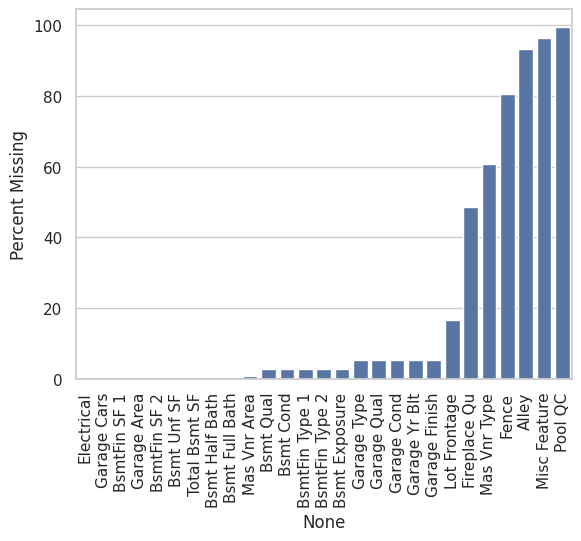

In [16]:
show_percent_missing(df)

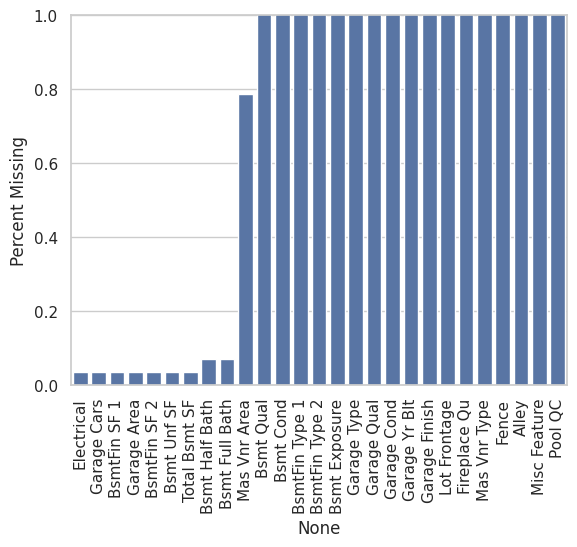

In [17]:
# Restricting y-axis to 1%
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percent Missing')
plt.ylim(0,1);


In [18]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [19]:
df[df['Electrical'].isnull()]['Garage Cars']

1577    2.0
Name: Garage Cars, dtype: float64

In [20]:
df = df.dropna(axis=0,subset=['Electrical','Garage Cars'])
percent_nan = percent_missing(df)
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

In [21]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [23]:
# Basement Numeric Columns -> fillna 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# Basement String Columns -. fillna 'None'
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

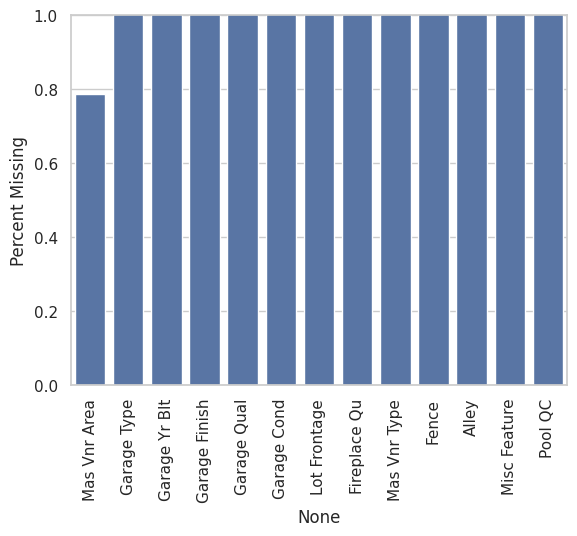

In [24]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percent Missing')
plt.ylim(0,1);

In [25]:
# Assuming that Mas Vnr is not present if these two features are na
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

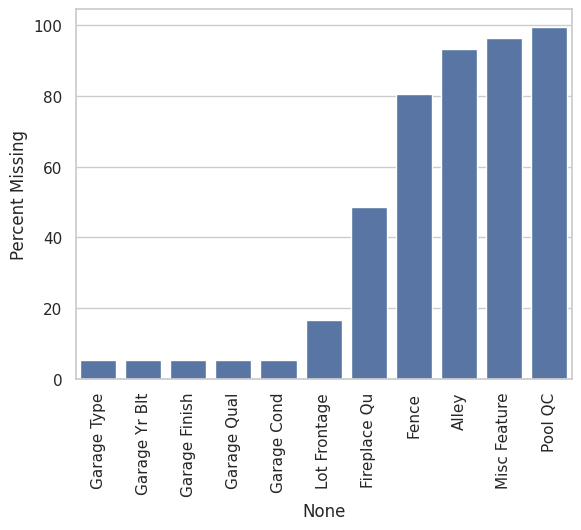

In [26]:
show_percent_missing(df)

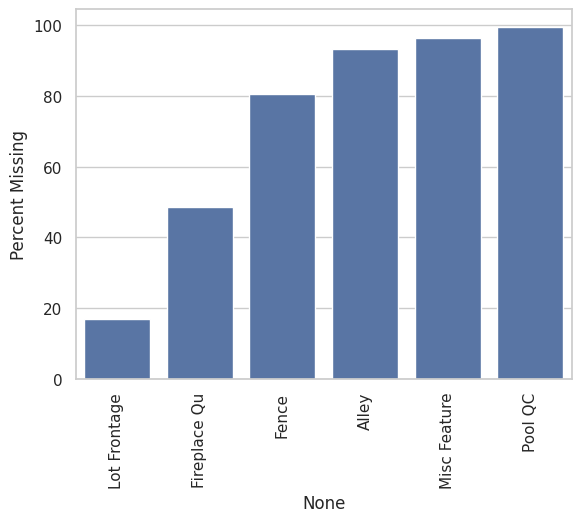

In [27]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

show_percent_missing(df)

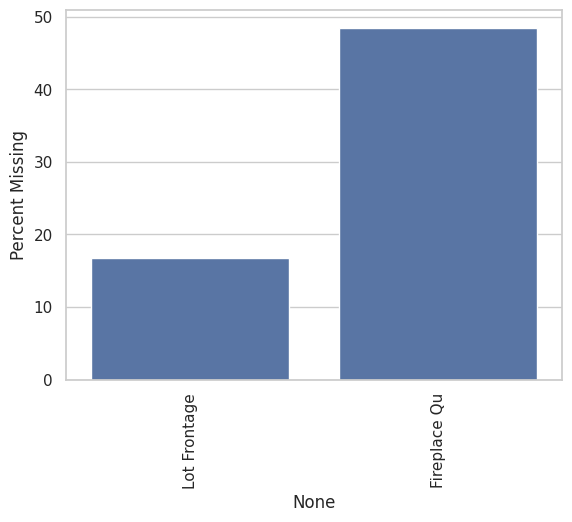

In [28]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)
show_percent_missing(df)

In [29]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

In [30]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

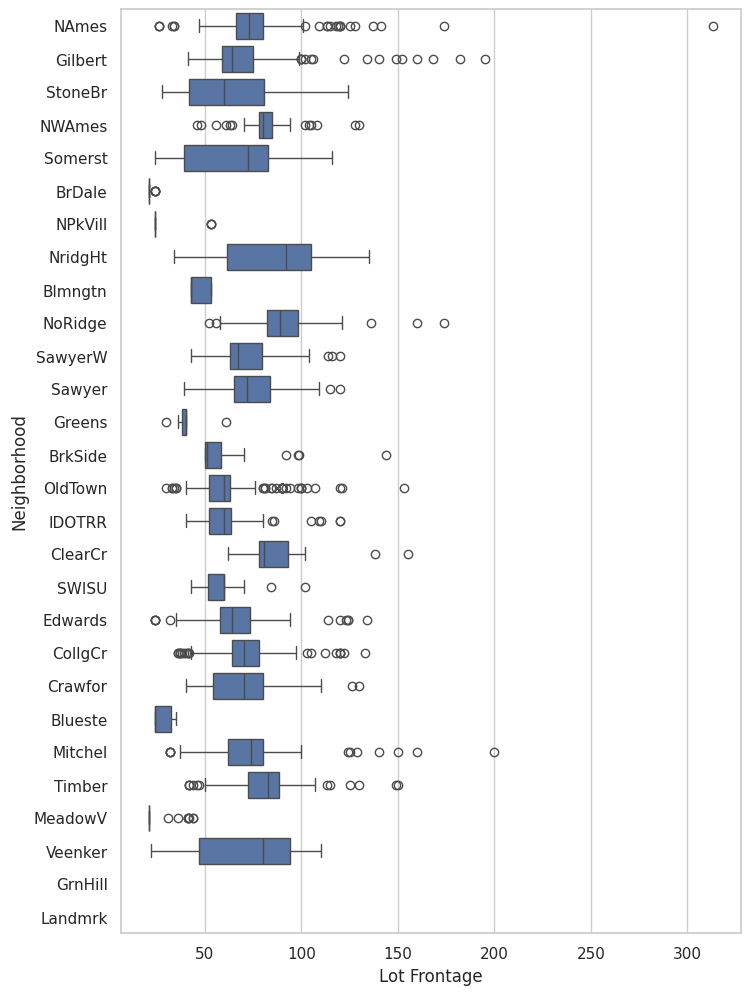

In [31]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h');

In [32]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [33]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))
df.isnull().sum().sort_values()

MS SubClass         0
Functional          0
TotRms AbvGrd       0
Kitchen Qual        0
Kitchen AbvGr       0
                 ... 
Roof Matl           0
Exter Cond          0
SalePrice           0
Lot Frontage        3
Fireplace Qu     1420
Length: 76, dtype: int64

In [34]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)
df.isnull().sum().sort_values()

MS SubClass         0
Functional          0
TotRms AbvGrd       0
Kitchen Qual        0
Kitchen AbvGr       0
                 ... 
Exterior 1st        0
Roof Matl           0
Roof Style          0
Exter Cond          0
Fireplace Qu     1420
Length: 76, dtype: int64

In [35]:
# Convert to String
df['MS SubClass'] = df['MS SubClass'].apply(str)

# Select all numerical features
df_nums = df.select_dtypes(exclude='object')

# Select all string features
df_objs = df.select_dtypes(include='object')

# Represent all string features numerically using one-hot encoding
df_objs = pd.get_dummies(df_objs,drop_first=True,dtype=int)

df = pd.concat([df_nums,df_objs],axis=1)
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
# Define X and y
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [37]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [38]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[5,10,50,100],
              'l1_ratio':[.9, .95, .99, 1]}

grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5)

grid_model.fit(scaled_X_train,y_train)
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [39]:
y_pred = grid_model.predict(scaled_X_test)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'MAE = {MAE} \n\nRMSE = {RMSE}')

MAE = 14193.463459942064 

RMSE = 20567.802913799438
